WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Ramakant Yadav\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


1800
(1800, 40000)
(1800,)


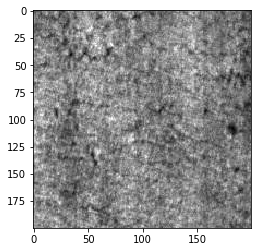

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 1

#%%
#  data

path1 = 'C:\\Users\\Ramakant Yadav\\Desktop\\Machine Learning Projects\\Train_images - Copy'    #path of folder of images    
path2 = 'C:\\Users\\Ramakant Yadav\\Desktop\\Machine Learning Projects\\Train_images - Copy1'  #path of folder to save images    

listing = os.listdir(path1)
num_samples=size(listing)
print(num_samples)

for file in listing:
    im = Image.open(path1 + '\\' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'\\' +  file, "JPEG")

imlist = os.listdir(path2)

im1 = array(Image.open('Train_images - Copy1' + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open('Train_images - Copy1'+ '\\' + im2)).flatten()
              for im2 in imlist],'f')
               
label=np.ones((num_samples,),dtype = int)
label[0:301]=0
label[301:601]=1
label[601:901]=2
label[901:1201]=3
label[1201:1501]=4
label[1501:1801]=5

data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

#%%



X_train shape: (1440, 1, 200, 200)
1440 train samples
360 test samples
label :  [1. 0. 0. 0. 0. 0.]
(1440, 6)


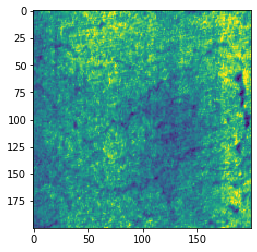

In [77]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 6
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
img_rows,img_cols=200,200
img_channels=1

#%%
(X, y) = (train_data[0],train_data[1])


# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0],1,img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0],1,img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 107
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])
print(Y_train.shape)

#%%


In [81]:

model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,200,200), data_format='channels_first'))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])

#%%



C:\Users\Ramakant Yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [83]:

hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
           
           
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_split=0.2)

C:\Users\Ramakant Yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1440 samples, validate on 360 samples
Epoch 1/20
1440/1440 [==============================] - 184s 128ms/step - loss: 1.8109 - accuracy: 0.2396 - val_loss: 1.6745 - val_accuracy: 0.2694
Epoch 2/20
1440/1440 [==============================] - 144s 100ms/step - loss: 1.6695 - accuracy: 0.3382 - val_loss: 1.4810 - val_accuracy: 0.3222
Epoch 3/20
1440/1440 [==============================] - 139s 96ms/step - loss: 1.5046 - accuracy: 0.4083 - val_loss: 1.2815 - val_accuracy: 0.5750
Epoch 4/20
1440/1440 [==============================] - 120s 83ms/step - loss: 1.3696 - accuracy: 0.4972 - val_loss: 1.2196 - val_accuracy: 0.4639
Epoch 5/20
1440/1440 [==============================] - 120s 83ms/step - loss: 1.1886 - accuracy: 0.5417 - val_loss: 1.0778 - val_accuracy: 0.5139
Epoch 6/20
1440/1440 [==============================] - 120s 83ms/step - loss: 1.0471 - accuracy: 0.6146 - val_loss: 1.0096 - val_accuracy: 0.5722
Epoch 7/20
1440/1440 [==============================] - 115s 80ms/ste

C:\Users\Ramakant Yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 1152 samples, validate on 288 samples
Epoch 1/20
1152/1152 [==============================] - 79s 68ms/step - loss: 0.3648 - accuracy: 0.8984 - val_loss: 0.1860 - val_accuracy: 0.9688
Epoch 2/20
1152/1152 [==============================] - 78s 68ms/step - loss: 0.1934 - accuracy: 0.9340 - val_loss: 0.2369 - val_accuracy: 0.9236
Epoch 3/20
1152/1152 [==============================] - 78s 68ms/step - loss: 0.1606 - accuracy: 0.9497 - val_loss: 0.1783 - val_accuracy: 0.9549
Epoch 4/20
1152/1152 [==============================] - 78s 68ms/step - loss: 0.1598 - accuracy: 0.9470 - val_loss: 0.1850 - val_accuracy: 0.9549
Epoch 5/20
1152/1152 [==============================] - 79s 69ms/step - loss: 0.1862 - accuracy: 0.9410 - val_loss: 0.1855 - val_accuracy: 0.9479
Epoch 6/20
1152/1152 [==============================] - 79s 68ms/step - loss: 0.1567 - accuracy: 0.9488 - val_loss: 0.1716 - val_accuracy: 0.9618
Epoch 7/20
1152/1152 [==============================] - 78s 68ms/step - loss:

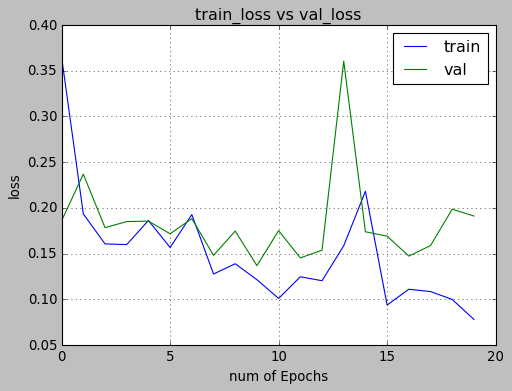

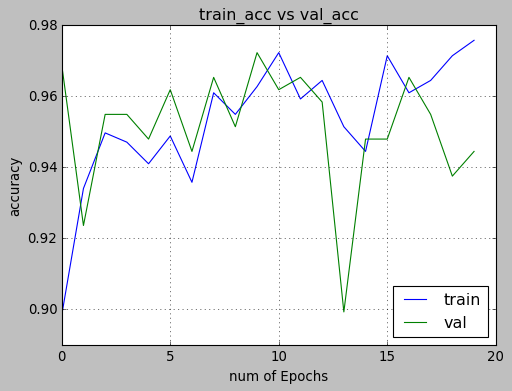

In [89]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [92]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])

Test score: 0.2672190195052988
Test accuracy: 0.9305555820465088
[1 1 5 0]
[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]


In [94]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[[9.9037019e-09 9.9943346e-01 2.6285996e-08 1.8852662e-04 4.3401789e-05
  3.3465191e-04]
 [2.3650820e-08 9.9825233e-01 1.6703338e-07 2.8931480e-04 8.7326232e-05
  1.3709028e-03]
 [2.0643664e-07 9.8185056e-01 1.5175395e-06 7.3120411e-04 1.9564864e-04
  1.7220858e-02]
 ...
 [6.5463737e-06 8.7986129e-12 9.9999189e-01 1.5646178e-06 2.4587254e-10
  1.4627104e-10]
 [1.2202798e-06 4.5007523e-03 1.8644311e-04 9.9503976e-01 4.5151840e-08
  2.7181904e-04]
 [9.8509789e-03 3.1746470e-08 9.4458392e-06 7.2205177e-04 9.8941296e-01
  4.6159093e-06]]
[1 1 1 5 0 0 4 2 2 0 0 1 1 3 2 5 3 0 4 2 3 0 1 0 2 0 0 2 1 3 0 2 1 1 0 2 5
 3 0 5 0 1 3 2 0 1 2 5 4 5 2 2 2 0 0 5 1 3 5 0 4 2 0 4 5 1 5 1 5 1 2 5 0 4
 4 3 4 3 3 0 2 3 1 2 3 4 2 4 3 3 5 4 3 5 0 4 4 4 3 3 2 2 1 3 3 1 2 2 2 3 2
 3 4 4 4 0 4 5 5 0 0 4 4 2 0 4 1 1 0 3 0 0 3 0 5 0 2 1 0 3 2 4 4 4 1 3 0 0
 5 0 5 1 5 3 3 2 0 5 1 3 4 4 2 2 0 4 5 2 2 2 3 4 4 0 3 2 3 3 2 2 5 4 0 5 2
 5 4 2 4 4 3 4 1 1 5 4 2 4 5 2 2 1 4 0 1 1 4 4 4 3 0 1 3 3 3 3 2 2 1 3 2 0
 1 1 4 0 1

In [95]:
# saving weights

fname = "weights-Test-CNN.hdf5"
model.save_weights(fname,overwrite=True)



# Loading weights

fname = "weights-Test-CNN.hdf5"
model.load_weights(fname)
